In [2]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split

housing = pd.read_csv("C:/Users/coryg/OneDrive/Desktop/STAT_574_Data_Mining/housing_data.csv")
coding = {'<1H OCEAN': 1, 'INLAND': 2, 'NEAR BAY': 3, 'NEAR OCEAN': 4}
housing['ocean_proximity'] = housing['ocean_proximity'].map(coding)
X = housing.iloc[:,0:7].values
y = housing.iloc[:,7].values

# Splitting data into 80% training and 20% test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=348644)

[Text(0.5, 0.875, 'median_income <= 4.604\nsquared_error = 9454558371.658\nsamples = 2273\nvalue = 159681.18'),
 Text(0.25, 0.625, 'ocean_proximity <= 2.5\nsquared_error = 4019766806.683\nsamples = 1750\nvalue = 124571.315'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'squared_error = 2108315648.595\nsamples = 923\nvalue = 94826.869'),
 Text(0.375, 0.375, 'median_income <= 2.52\nsquared_error = 4063612420.212\nsamples = 827\nvalue = 157768.563'),
 Text(0.25, 0.125, 'squared_error = 3574213185.755\nsamples = 292\nvalue = 119871.925'),
 Text(0.5, 0.125, 'squared_error = 3119059840.335\nsamples = 535\nvalue = 178452.336'),
 Text(0.75, 0.625, 'median_income <= 6.343\nsquared_error = 9713434563.573\nsamples = 523\nvalue = 277161.608'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'squared_error = 5130481580.912\nsamples = 339\nvalue = 232331.858'),
 Text(0.875, 0.375, 'squared_error = 7632602526.389\nsamples = 184\nvalue = 359755.549')]

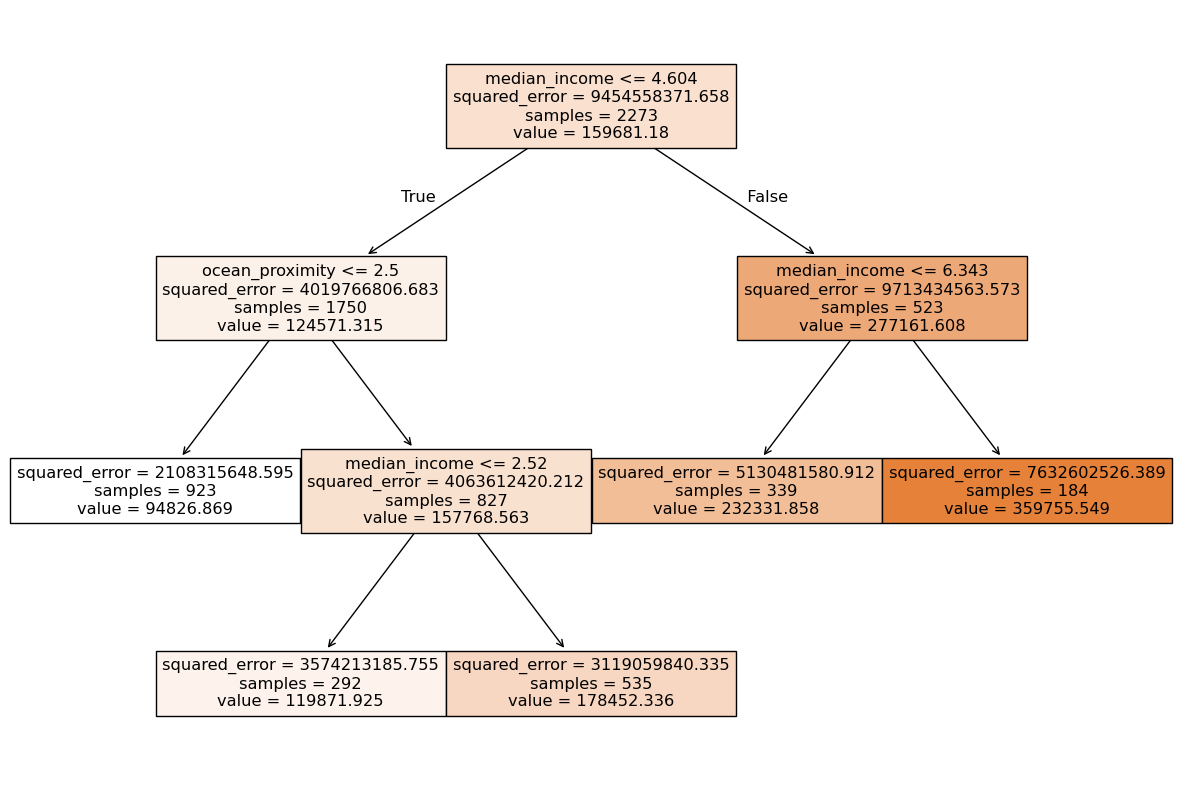

In [3]:
# Fitting regression tree with RSS Splitting Criterion

rtree = DecisionTreeRegressor(random_state=907420, criterion="squared_error",
                              max_leaf_nodes=5)
reg_tree_RSS = rtree.fit(X_train, y_train)

# Plotting fitted tree

fig = plt.figure(figsize=(15,10))
fn = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population',
      'households', 'median_income', 'ocean_proximity']
tree.plot_tree(reg_tree_RSS, feature_names=fn, filled=True)

In [4]:
# Computing prediction accuracy from testing data

y_pred = reg_tree_RSS.predict(X_test)
ind10 = []
ind15 = []
ind20 = []

for sub1, sub2 in zip(y_pred, y_test):
    ind10.append(1) if abs(sub1-sub2)<0.10*sub2 else ind10.append(0)
    ind15.append(1) if abs(sub1-sub2)<0.15*sub2 else ind15.append(0)
    ind20.append(1) if abs(sub1-sub2)<0.20*sub2 else ind20.append(0)

# accuracy within 10%

accuracy10 = sum(ind10)/len(ind10)
print(accuracy10)

#accuracy within 15%

accuracy15 = sum(ind15)/len(ind15)
print(accuracy15)

#accuracy within 20%

accuracy20 = sum(ind20)/len(ind20)
print(accuracy20)

0.2671353251318102
0.36731107205623903
0.46045694200351495


In [6]:
#Fitting regression tree with CHAID splitting criterion

#Splitting response variable into deciles and making them nominal

housing['deciles'] = pd.qcut(housing['median_house_value'], 10, labels=False)
deciles_coding = {0:'0th', 1:'1st', 2:'2nd', 3:'3rd', 4:'4th', 5:'5th', 6:'6th', 7:'7th', 8:'8th', 9:'9th'}
housing['deciles'] = housing['deciles'].map(deciles_coding)

X = housing.iloc[:,0:7].values
y = housing.iloc[:, 7:9].values

# Splitting data into 80% training and 20% testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=348644)

X_train = pd.DataFrame(X_train, columns=['housing_median_age', 'total_rooms', 
                                         'total_bedrooms', 'population', 'households',
                                         'median_income', 'ocean_proximity'])
y_train = pd.DataFrame(y_train[:,1], columns=['deciles'])
train_data = pd.concat([X_train, y_train], axis=1)

In [7]:
# Fitting tree

from chefboost import Chefboost

config = {'algorithm': 'CHAID', 'max_depth': 4}
tree_chaid = Chefboost.fit(train_data, config, target_label='deciles')

25-01-23 18:46:50 - CHAID tree is going to be built...
25-01-23 18:47:03 - -------------------------
25-01-23 18:47:03 - finished in 12.098124742507935 seconds
25-01-23 18:47:03 - -------------------------
25-01-23 18:47:03 - Evaluate train set
25-01-23 18:47:03 - -------------------------
25-01-23 18:47:03 - Accuracy: 26.484821821381434% on 2273 instances
25-01-23 18:47:03 - Labels: ['2nd' '1st' '0th' '5th' '6th' '9th' '7th' '3rd' '4th' '8th']
25-01-23 18:47:03 - Confusion matrix: [[17, 4, 0, 16, 8, 12, 15, 9, 6, 14], [27, 66, 62, 3, 2, 1, 2, 25, 13, 1], [56, 89, 138, 15, 5, 2, 0, 52, 48, 3], [39, 27, 5, 57, 25, 2, 21, 34, 20, 8], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [2, 1, 0, 35, 53, 118, 65, 5, 12, 82], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [63, 49, 18, 62, 42, 6, 35, 87, 79, 16], [13, 1, 2, 22, 24, 26, 7, 14, 31, 11], [10, 1, 0, 28, 58, 65, 68, 4, 21, 88]]
25-01-23 18:47:03 - Decision 2nd
25-01-23 18:47:03 - Accuracy: 87.0656
25-01-23 18:47:03 - Precision: 16.8317%, Recall: 7.489%, F1: 10.365

In [8]:
# using fitted model to predict for testing data

X_test = pd.DataFrame(X_test, columns=['housing_median_age', 'total_rooms',
                                       'total_bedrooms', 'population', 'households',
                                       'median_income', 'ocean_proximity'])

y_pred = []
for i in range(len(y_test)):
    y_pred.append(Chefboost.predict(tree_chaid, X_test.iloc[i,:]))

#Computing prediction accuracy for testing data

y_test = pd.DataFrame(y_test[:,0], columns=['median_house_value'])
y_pred = pd.DataFrame(y_pred, columns=['predclass'])
pred_data = pd.concat([y_test, y_pred], axis=1)

df_new = pred_data.groupby('predclass')['median_house_value'].mean()
inner_join = pd.merge(pred_data, df_new, on='predclass', how='inner')

ind10 = []
ind15 = []
ind20 = []

for sub1, sub2 in zip(inner_join['median_house_value_x'], inner_join['median_house_value_y']):
    ind10.append(1) if abs(sub1-sub2)<0.10*sub1 else ind10.append(0)
    ind15.append(1) if abs(sub1-sub2)<0.15*sub1 else ind15.append(0)
    ind20.append(1) if abs(sub1-sub2)<0.20*sub1 else ind20.append(0)

#accuracy within 10%

accuracy10 = sum(ind10)/len(ind10)
print(accuracy10)

#accuracy within 15% 

accuracy15 = sum(ind15)/len(ind15)
print(accuracy15)

#accuracy within 20%

accuracy20 = sum(ind20)/len(ind20)
print(accuracy20)

c:\Users\coryg\OneDrive\Desktop\STAT_574_Data_Mining\outputs\rules\rules.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if obj[5]<=3.553185833699956:
c:\Users\coryg\OneDrive\Desktop\STAT_574_Data_Mining\outputs\rules\rules.py:47: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif obj[5]>3.553185833699956:
c:\Users\coryg\OneDrive\Desktop\STAT_574_Data_Mining\outputs\rules\rules.py:49: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


0.17926186291739896
0.27240773286467485
0.35500878734622143
